# Data analysis

In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.classifier import SVMLinearClassifier, Data, ClassifierTuning, CrossValidation
from assignment_2.digits_classifiers.io.read_datasets import read_datasets

In [2]:
data = read_datasets()

Reading datasets


In [3]:
X, y = data

In [4]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]

In [5]:
X.drop(columns=always_zero, axis=1, inplace=True)

Restricting dataset

In [6]:
X, _, y, _ = train_test_split(X, y, test_size=0.9)

Splitting train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
data = Data(x=X, y=y)
train = Data(x=X_train, y=y_train)
test = Data(x=X_test, y=y_test)

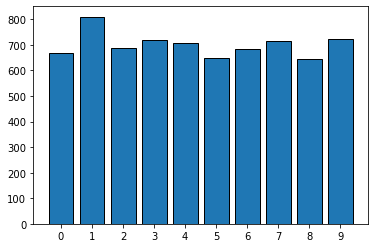

In [9]:
data.digit_distribution()

## Training SVM

In [10]:
classifiers = [
    SVMLinearClassifier(train=train, test=test, c=c)
    for c in [1, 2, 5, 10]
]

In [11]:
tuning = ClassifierTuning(classifiers=classifiers, data=data, k=3)

In [12]:
tuning.evaluate_best_model()

Evaluating classifier: 
TRAIN: 5600
TEST: 1400
C: 1
Degree: 1
Processing fold 1
Processing fold 2
Processing fold 3
0.946857869082247
Change
Evaluating classifier: 
TRAIN: 5600
TEST: 1400
C: 2
Degree: 1
Processing fold 1
Processing fold 2
Processing fold 3
0.9521431759511985
Change
Evaluating classifier: 
TRAIN: 5600
TEST: 1400
C: 5
Degree: 1
Processing fold 1
Processing fold 2
Processing fold 3
0.9531428903185221
Change
Evaluating classifier: 
TRAIN: 5600
TEST: 1400
C: 10
Degree: 1
Processing fold 1
Processing fold 2
Processing fold 3
0.9538572169774575
Change


In [13]:
tuning.best_model

TRAIN: 4668
TEST: 2332
C: 10
Degree: 1